# JupyterLab Data Visualization Example: Exploring N-body Simulations

This example is an old exercise from Carnegie Observatories summer workshops: https://github.com/eonadler/Colab-Notebooks

You can copy view/edit/run this in your clusters OpenOnDemand portal: https://carnegiescience.refined.site/space/HPC/391086081/Open+OnDemand

The three-body problem involves taking the initial positions and velocities of three point masses that orbit each other in space and calculating their subsequent trajectories using Newtons laws of motion and universal gravitation. This notebook demonstrates how an N-body simulation for three gravitating particles can be performed in Python.

In [ ]:
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors

%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('dark_background')
     
def initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0,Nsteps=2500):
  #Define position/velocity arrays
  p1, v1 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))
  p2, v2 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))
  p3, v3 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))

  #initial vals
  p1[0], p2[0], p3[0] = p1_0, p2_0, p3_0
  v1[0], v2[0], v3[0] = v1_0, v2_0, v3_0

  return p1, v1, p2, v2, p3, v3

def get_acceleration(p1,p2,m):
	displacement = p1-p2
	acceleration = -1.*m*displacement/((np.sqrt(np.sum(displacement**2,axis=0)))**(3./2.))
	return acceleration

def evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3,dt=0.01,Nsteps=2500):
  for i in range(Nsteps-1):
    dv1 = get_acceleration(p1[i],p2[i],m2) + get_acceleration(p1[i],p3[i],m3)
    dv2 = get_acceleration(p2[i],p1[i],m1) + get_acceleration(p2[i],p3[i],m3)
    dv3 = get_acceleration(p3[i],p1[i],m1) + get_acceleration(p3[i],p2[i],m2)

    #Update velocities, then positions
    v1[i + 1] = v1[i] + dv1*dt
    v2[i + 1] = v2[i] + dv2*dt
    v3[i + 1] = v3[i] + dv3*dt

    p1[i + 1] = p1[i] + v1[i]*dt
    p2[i + 1] = p2[i] + v2[i]*dt
    p3[i + 1] = p3[i] + v3[i]*dt

  return p1, p2, p3

#Set particle masses
m1 = 3
m2 = 6
m3 = 9

#Set initial positions and velocities
p1_0 = np.array([3., 1.])
v1_0 = np.array([-4, 1.])

p2_0 = np.array([1., 6.])
v2_0 = np.array([1., -0.1])

p3_0 = np.array([1., 1.])
v3_0 = np.array([4., 0.])

p1, v1, p2, v2, p3, v3 = initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0)
p1, p2, p3 = evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3)

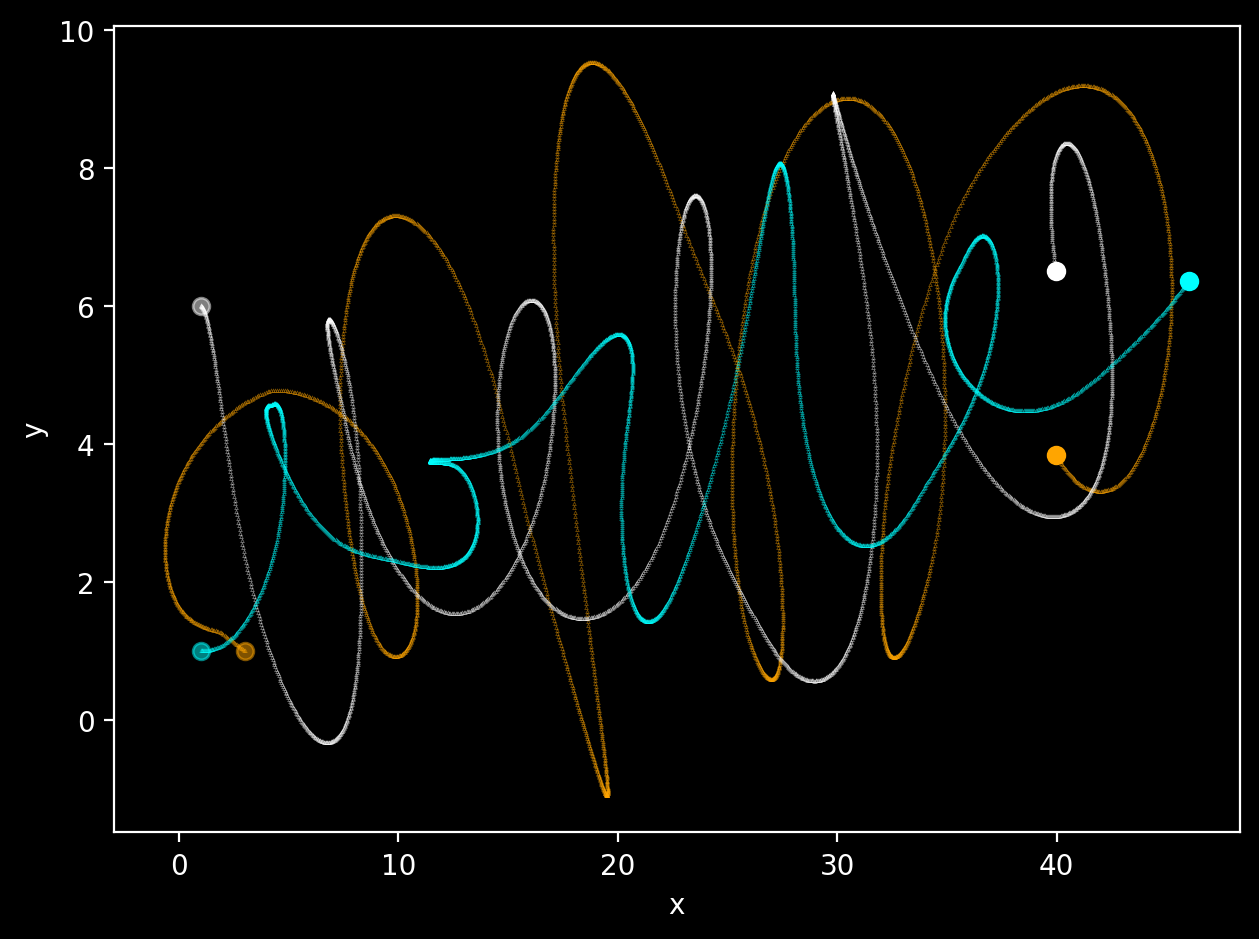

In [ ]:
#Visualize evolution
fig = plt.figure()

plt.plot([i[0] for i in p1], [j[1] for j in p1], '^', color='orange', markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p2], [j[1] for j in p2], '^', color='white', markersize = 0.01, alpha=0.5)
plt.plot([i[0] for i in p3], [j[1] for j in p3], '^', color='cyan', markersize = 0.01, alpha=0.5)

plt.plot(p1[0][0], p1[0][1], color='orange', marker='o', alpha=0.5)
plt.plot(p1[-1][0], p1[-1][1], color='orange', marker='o', alpha=1)

plt.plot(p2[0][0], p2[0][1], color='white', marker='o', alpha=0.5)
plt.plot(p2[-1][0], p2[-1][1], color='white', marker='o', alpha=1)

plt.plot(p3[0][0], p3[0][1], color='cyan', marker='o', alpha=0.5)
plt.plot(p3[-1][0], p3[-1][1], color='cyan', marker='o', alpha=1)

plt.xlabel(r'x')
plt.ylabel(r'y')
plt.tight_layout()
plt.show()

### Change of Masses and Initial Conditions for Evolution

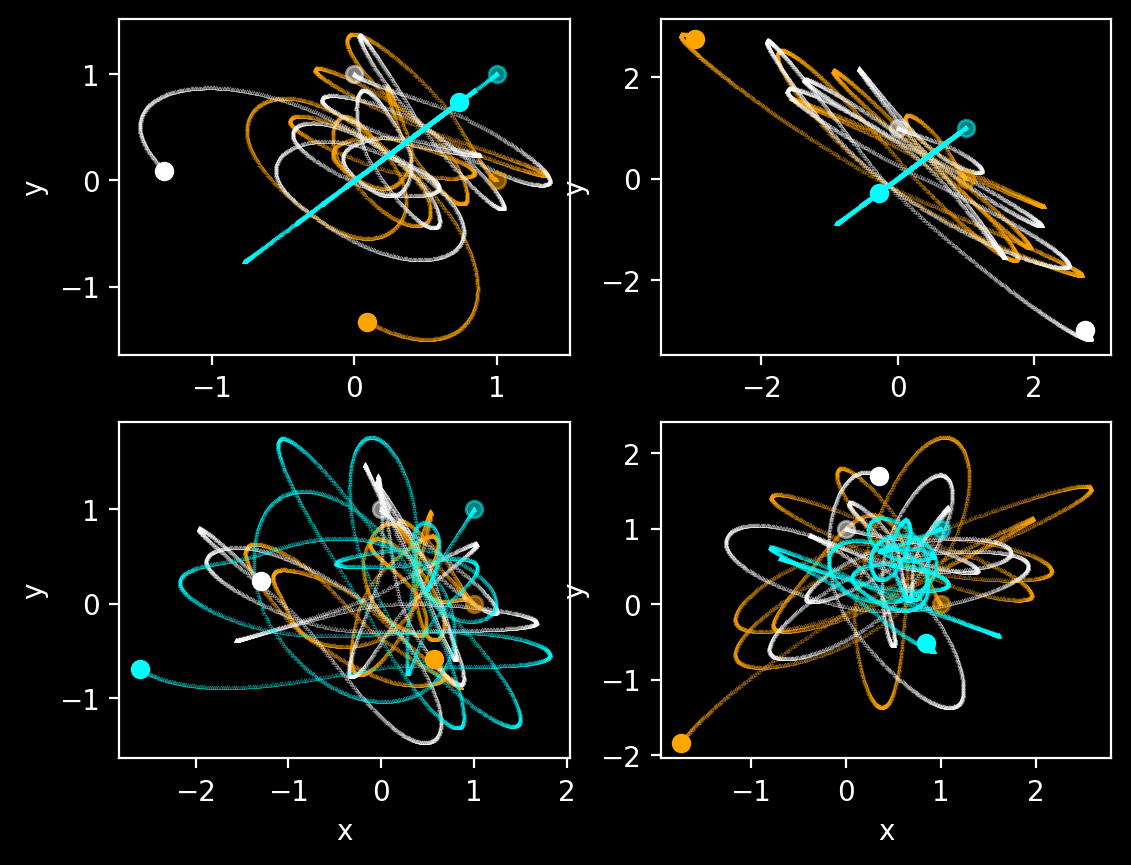

In [ ]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'
     
def initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0,Nsteps=2500):
  #Define position/velocity arrays
  p1, v1 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))
  p2, v2 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))
  p3, v3 = np.zeros((Nsteps,2)), np.zeros((Nsteps,2))

  #initial vals
  p1[0], p2[0], p3[0] = p1_0, p2_0, p3_0
  v1[0], v2[0], v3[0] = v1_0, v2_0, v3_0

  return p1, v1, p2, v2, p3, v3

def get_acceleration(p1,p2,m):
	displacement = p1-p2
	acceleration = -1.*m*displacement/((np.sqrt(np.sum(displacement**2,axis=0)))**(3./2.))
	return acceleration

def evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3,dt=0.01,Nsteps=2500):
  for i in range(Nsteps-1):
    dv1 = get_acceleration(p1[i],p2[i],m2) + get_acceleration(p1[i],p3[i],m3)
    dv2 = get_acceleration(p2[i],p1[i],m1) + get_acceleration(p2[i],p3[i],m3)
    dv3 = get_acceleration(p3[i],p1[i],m1) + get_acceleration(p3[i],p2[i],m2)

    #Update velocities, then positions
    v1[i + 1] = v1[i] + dv1*dt
    v2[i + 1] = v2[i] + dv2*dt
    v3[i + 1] = v3[i] + dv3*dt

    p1[i + 1] = p1[i] + v1[i]*dt
    p2[i + 1] = p2[i] + v2[i]*dt
    p3[i + 1] = p3[i] + v3[i]*dt

  return p1, p2, p3

#Set particle masses
m1 = 1
m2 = 1
m3 = 1
p1_0 = np.array([1., 0.])
v1_0 = np.array([-0.1, 0.])
p2_0 = np.array([0., 1.])
v2_0 = np.array([0., -0.1])
p3_0 = np.array([1., 1.])
v3_0 = np.array([0., 0.])
p1, v1, p2, v2, p3, v3 = initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0)
p1, p2, p3 = evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3)

fig,axs = plt.subplots(2,2)

axs[0,0].plot([i[0] for i in p1], [j[1] for j in p1], '^', color='orange', markersize = 0.01, alpha=0.5)
axs[0,0].plot([i[0] for i in p2], [j[1] for j in p2], '^', color='white', markersize = 0.01, alpha=0.5)
axs[0,0].plot([i[0] for i in p3], [j[1] for j in p3], '^', color='cyan', markersize = 0.01, alpha=0.5)
axs[0,0].plot(p1[0][0], p1[0][1], color='orange', marker='o', alpha=0.5)
axs[0,0].plot(p1[-1][0], p1[-1][1], color='orange', marker='o', alpha=1)
axs[0,0].plot(p2[0][0], p2[0][1], color='white', marker='o', alpha=0.5)
axs[0,0].plot(p2[-1][0], p2[-1][1], color='white', marker='o', alpha=1)
axs[0,0].plot(p3[0][0], p3[0][1], color='cyan', marker='o', alpha=0.5)
axs[0,0].plot(p3[-1][0], p3[-1][1], color='cyan', marker='o', alpha=1)

#Set particle masses
m1 = 2
m2 = 2
m3 = 2
p1_0 = np.array([1., 0.])
v1_0 = np.array([-0.1, 0.])
p2_0 = np.array([0., 1.])
v2_0 = np.array([0., -0.1])
p3_0 = np.array([1., 1.])
v3_0 = np.array([0., 0.])
p1, v1, p2, v2, p3, v3 = initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0)
p1, p2, p3 = evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3)

axs[0,1].plot([i[0] for i in p1], [j[1] for j in p1], '^', color='orange', markersize = 0.01, alpha=0.5)
axs[0,1].plot([i[0] for i in p2], [j[1] for j in p2], '^', color='white', markersize = 0.01, alpha=0.5)
axs[0,1].plot([i[0] for i in p3], [j[1] for j in p3], '^', color='cyan', markersize = 0.01, alpha=0.5)
axs[0,1].plot(p1[0][0], p1[0][1], color='orange', marker='o', alpha=0.5)
axs[0,1].plot(p1[-1][0], p1[-1][1], color='orange', marker='o', alpha=1)
axs[0,1].plot(p2[0][0], p2[0][1], color='white', marker='o', alpha=0.5)
axs[0,1].plot(p2[-1][0], p2[-1][1], color='white', marker='o', alpha=1)
axs[0,1].plot(p3[0][0], p3[0][1], color='cyan', marker='o', alpha=0.5)
axs[0,1].plot(p3[-1][0], p3[-1][1], color='cyan', marker='o', alpha=1)

#Set particle masses
m1 = 3
m2 = 2
m3 = 1
p1_0 = np.array([1., 0.])
v1_0 = np.array([-0.1, 0.])
p2_0 = np.array([0., 1.])
v2_0 = np.array([0., -0.1])
p3_0 = np.array([1., 1.])
v3_0 = np.array([0., 0.])
p1, v1, p2, v2, p3, v3 = initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0)
p1, p2, p3 = evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3)

axs[1,0].plot([i[0] for i in p1], [j[1] for j in p1], '^', color='orange', markersize = 0.01, alpha=0.5)
axs[1,0].plot([i[0] for i in p2], [j[1] for j in p2], '^', color='white', markersize = 0.01, alpha=0.5)
axs[1,0].plot([i[0] for i in p3], [j[1] for j in p3], '^', color='cyan', markersize = 0.01, alpha=0.5)
axs[1,0].plot(p1[0][0], p1[0][1], color='orange', marker='o', alpha=0.5)
axs[1,0].plot(p1[-1][0], p1[-1][1], color='orange', marker='o', alpha=1)
axs[1,0].plot(p2[0][0], p2[0][1], color='white', marker='o', alpha=0.5)
axs[1,0].plot(p2[-1][0], p2[-1][1], color='white', marker='o', alpha=1)
axs[1,0].plot(p3[0][0], p3[0][1], color='cyan', marker='o', alpha=0.5)
axs[1,0].plot(p3[-1][0], p3[-1][1], color='cyan', marker='o', alpha=1)

#Set particle masses
m1 = 1
m2 = 2
m3 = 3
p1_0 = np.array([1., 0.])
v1_0 = np.array([-0.1, 0.])
p2_0 = np.array([0., 1.])
v2_0 = np.array([0., -0.1])
p3_0 = np.array([1., 1.])
v3_0 = np.array([0., 0.])
p1, v1, p2, v2, p3, v3 = initialize_particles(p1_0,v1_0,p2_0,v2_0,p3_0,v3_0)
p1, p2, p3 = evolve(p1,v1,m1,p2,v2,m2,p3,v3,m3)

axs[1,1].plot([i[0] for i in p1], [j[1] for j in p1], '^', color='orange', markersize = 0.01, alpha=0.5)
axs[1,1].plot([i[0] for i in p2], [j[1] for j in p2], '^', color='white', markersize = 0.01, alpha=0.5)
axs[1,1].plot([i[0] for i in p3], [j[1] for j in p3], '^', color='cyan', markersize = 0.01, alpha=0.5)
axs[1,1].plot(p1[0][0], p1[0][1], color='orange', marker='o', alpha=0.5)
axs[1,1].plot(p1[-1][0], p1[-1][1], color='orange', marker='o', alpha=1)
axs[1,1].plot(p2[0][0], p2[0][1], color='white', marker='o', alpha=0.5)
axs[1,1].plot(p2[-1][0], p2[-1][1], color='white', marker='o', alpha=1)
axs[1,1].plot(p3[0][0], p3[0][1], color='cyan', marker='o', alpha=0.5)
axs[1,1].plot(p3[-1][0], p3[-1][1], color='cyan', marker='o', alpha=1)

for ax in axs.flat:
    ax.set(xlabel='x', ylabel='y')